# Hypothesis


***

# I. T-Test (One sample )
Comparing a sample average to a hypothetical population average

`Assumptions of a One Sample T-Test`
<br/>
When running any hypothesis test, it is important to know and verify the assumptions of the test

1. The sample was randomly selected from the population
2. The individual observations were independent
3. The data is normally distributed without outliers OR the sample size is large (enough) 
    - There are no set rules on what a “large enough” sample size is, but a common threshold is around 40. 

`Note:` 
In general, if you run an experiment that violates (or possibly violates) one of these assumptions, you can still run the test and report the results but you should also report assumptions that were not met and acknowledge that the test results could be flawed.

### Example Data
Blood transfusion is the process of transferring blood products into a person's circulation intravenously. Transfusions are used for various medical conditions to replace lost components of the blood.

The first thing we want to know is whether Familiar’s most basic package, the Vein Pack, actually has a significant impact on the subscribers. It would be a marketing goldmine if we can show that subscribers to the Vein Pack live longer than other people.

### Importing Necessary Libary and Packages

In [1]:
#
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, binom_test, f_oneway, chi2_contingency, chi2
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### - Loading our Dataset

In [9]:
url = 'https://raw.githubusercontent.com/Alyxx-The-Sniper/Statistics/main/dataset_files/familiar_lifespan.csv'
df = pd.read_csv(url)
print(df.shape)
df.head(3)

(45, 2)


,pack,lifespan
0,vein,76.255090
1,artery,76.404504
2,artery,75.952442


In [8]:
#
df = pd.read_csv('dataset_files/familiar_lifespan.csv')
print(df.shape)
df.sample(2)

(45, 2)


,pack,lifespan
23,vein,74.798150
43,artery,73.902213


### - Outliers

<AxesSubplot:xlabel='pack', ylabel='lifespan'>

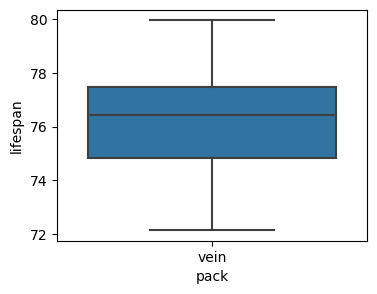

In [17]:
#
plt.figure(figsize=(4,3))
sns.boxplot(x='pack', y='lifespan', data=vein)

The vein package does not contain any outliers, so we will proceed with checking the skewness and kurtosis of its histogram.

### - Histogram Plot
Check skewness and kurtusis

0.11135242834531889
-0.4476564463205979


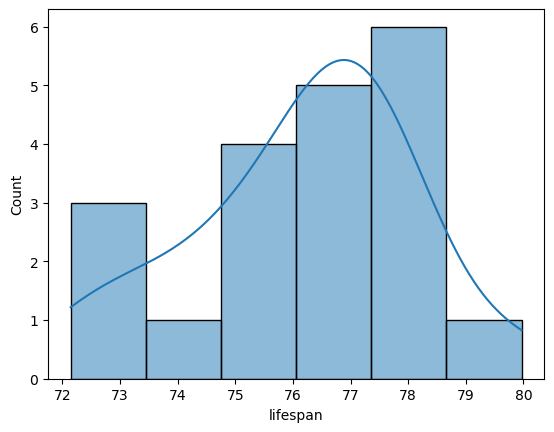

In [12]:
# Create new vein dataframe
vein = df[df['pack']=='vein']

sns.histplot(vein.lifespan,
            kde=True,)
print(vein.lifespan.kurt())
print(vein.lifespan.skew())


The distribution appears to be fairly symmetric.

### - The Null and Alternative Hypothesis

`The average lifespan of a Filipino people is 72 years old (as per google)`

1. Ho: mu = 72
     - The average lifespan of vein package is 72 years old   
2. Ha: mu > 72
     - The average lifespan of vein package is greater than 72 years old (76.169 base on our sample)   


### -  ttest_1samp

In [5]:
t_statistic, p_value = stats.ttest_1samp(a=np.array(vein.lifespan), popmean=72, 
                                         alternative='greater')
t_statistic, p_value

(9.645135622062547, 4.6943502686321065e-09)

The T-score of 9.64 is relatively large, indicating that the sample mean is significantly different from the population mean. It is important to note that the sample standard deviation (sigma) has a considerable impact on the T-score.

### - Manual Computation of T-statistic and P-value

In [6]:
# setting variables
# hypothesis mean
mu = 72
# number of samples
n = len(vein.lifespan)
# sample mean
x_bar = np.mean(vein.lifespan)
# sample standard devation
sigma = np.std(vein.lifespan)
# confidence level
c = .95
# significant level (5%)
a = 1-c 

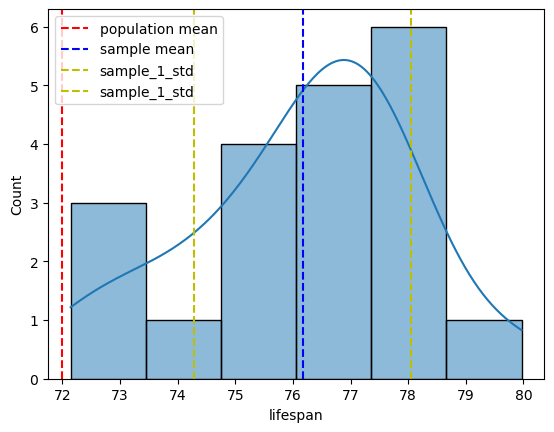

In [7]:
# visualization
sns.histplot(vein.lifespan,kde=True,)
plt.axvline(mu, linestyle='--', color='r', label='population mean')
plt.axvline(x_bar, linestyle='--', color='b', label='sample mean')
plt.axvline(x_bar + sigma, linestyle='--', color='y', label='sample_1_std')
plt.axvline(x_bar - sigma, linestyle='--', color='y', label='sample_1_std')
plt.legend() 

In situations where the population standard deviation is unknown, the standard error can be estimated using the sample standard deviation and the sample size. This estimation is used in calculating confidence intervals and conducting hypothesis tests.

`Standard Error:`

Standard error is the standard deviation of the sampling distribution. We can estimate it using the formula: 

`Standard Error = Standard Deviation / √(Sample Size)` 

Imagine taking the mean of 5 random samples, and then taking the standard deviation of those 5 sample means. That value would become the standard error. This also shows how dispersed our 5 sample means are from the mean of means.

The standard error is important because it helps us to determine the precision of our estimates and to construct confidence intervals for population parameters based on our sample data. A smaller standard error indicates that our sample mean is a more precise estimate of the true population mean, while a larger standard error indicates that our sample mean is a less precise estimate of the true population mean. The exact cutoffs for what constitutes a "low" or "high" standard error will depend on the context and the specific study.

For example, in a study with a large sample size, even a small difference between the sample mean and population mean may be statistically significant. In contrast, a smaller sample size may require a more substantial difference to achieve statistical significance. Additionally, the context of the study may impact the interpretation of a standard error. 

In [8]:
std_error = sigma / (n ** 0.5)
print(std_error)
print(sigma) # std of our sample

0.42129543216318566
1.884090449854069


`T-statistic:`

The t-statistic is a test statistic `used in hypothesis testing when the population standard deviation is unknown` and must be estimated from the sample data. `It is used to determine if there is a significant difference between the mean of a sample and the mean of a population` when the sample size is small (less than 30) or when the population is not normally distributed. The t-statistic is calculated as the difference between the sample mean and the hypothesized population mean, divided by the standard error of the sample mean.``

 The formula for the t-statistic is:

`t = (x̄ - μ) / (s / √n)`

where x̄ is the sample mean, μ is the hypothesized population mean, s is the sample standard deviation, n is the sample size, and √n is the square root of the sample size. The standard error is calculated as s / √n, which is used in the denominator of the t-statistic formula.

The T-statistic we computed manually is consistent with the output from the 'stats.ttest_1samp' function. We can consult the T-statistic table to obtain the corresponding P-value, which is very low compared to the chosen significance level.

In [12]:
# t-statistic
t = (x_bar - mu) / std_error
t

9.895700351161551

### T-statistic

Link for t-table: https://www.statisticshowto.com/tables/t-distribution-table/

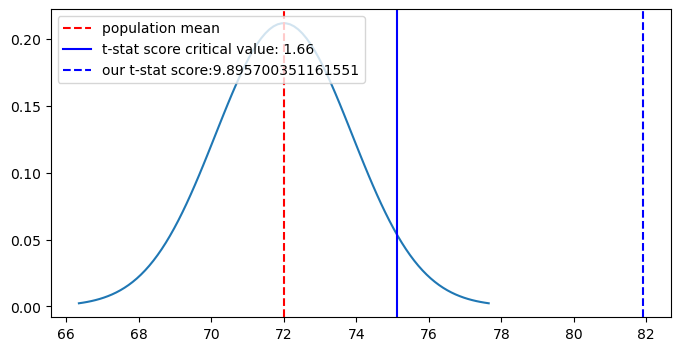

In [16]:
plt.figure(figsize=(8,4))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.axvline(mu, linestyle='--', color='r', label='population mean')
# t-stat critical value can be seen in the t-table (above link)
plt.axvline(mu + 1.66*sigma, linestyle='-', color='b', label='t-stat score critical value: 1.66')
plt.axvline(mu + t , linestyle='--', color='b', label='our t-stat score:' + str(t))

plt.legend(loc='upper left')

### P value

'0.0000000047'

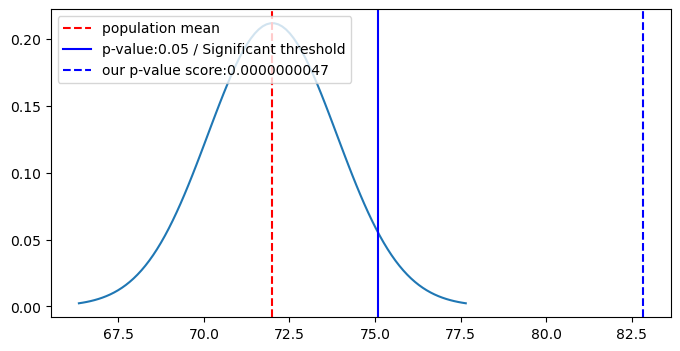

In [18]:
plt.figure(figsize=(8,4))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.axvline(mu, linestyle='--', color='r', label='population mean')
plt.axvline(stats.norm.ppf(1 - 0.05, mu, sigma), color='b', linestyle='-', label='p-value:0.05 / Significant threshold')
plt.axvline(stats.norm.ppf(1 - p_value, mu, sigma), color='b', linestyle='--', label='our p-value score:' + "{:.10f}".format(p_value))

plt.legend(loc='upper left')
# P Value
"{:.10f}".format(p_value)

### `T-Test Hypothesis Conclusion:`
The p-value is very small, indicating strong evidence against the null hypothesis. This suggests that subscribers of the Veins package have a longer lifespan compared to the average lifespan of Filipino people.


***

***

# Binomial Test
Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that: binomial tests are used for `binary categorical data` to compare a `sample frequency` to an expected population-level probability.

`usage:`
1. is there a fix number of trials?
2. are there only two possible outcomes?
3. are the outcomes independent to eash other?
4. does the probability of success remain the same for each trial?

### Example 1
Let's compare if 'Artery package' is more preferable than than the 'Vein package'.

#### `Reminders:`
Stating a null hypothesis means that there is always no significant difference between comparisons while the alternative hypothesis state that there is a significant differences.

- Ho: artery = vien
- Ha: artery > vien

In [ ]:
# Setting variables
artery = df[df['pack']=='artery']

population = len(df)
artery_count = len(artery)
vein_count = len(vein)

print(population, artery_count, vein_count)

In [ ]:
# probability choosing between 'Artery' and 'Vein' pack is at 50%
# significant level at 95%
pval_greater = binom_test(artery_count, population, p=0.5, 
                          alternative='greater',
                         )
pval_greater

We failed to reject the null hypothesis thus there is no significant difference between 'Artery' and 'Vein' package. Our population has no preferable chooice between the two packages.

### Example 2
- Ho: vien = artery
- Ha: vien < artery

In [ ]:
pval_less = binom_test(vein_count, population, p=0.5, 
                          alternative='less',
                         )
pval_less

At 95% confident we are failed to reject the null hypothesis. There is no significant difference between 'Vein' and 'Artery' packages frequency.

***

***

# T-Test (Two Sample)
Comparing Quantitative and Binary Variables with their mean value.

### Example 1

Testing 'Vein' and 'Artery' means.

### State the null and alternative hypothesis
- Ho: vein = artery (in terms of mean/average) 
- Ha: vein != artery (in terms of mean)

#### Check the sample size between the two categories

In [ ]:
print(len(vein))
print(len(artery))

In [ ]:
# perform binomial two tailed test to check if both categories has a significant differences in 
# terms of frequency
pval_greater = binom_test(artery_count, population, p=0.5, alternative='two-sided')
pval_greater

Our two-sided pval state that we failed to reject the null hypothesis. Theres no significant difference between the two categories. 

#### Check if STD is equal

In [ ]:
ratio = np.std(vein.lifespan) / np.std(artery.lifespan)
print(np.std(vein.lifespan))
print(np.std(artery.lifespan))
ratio

A ratio between 0.9 and 1.1 should suffice. Even we have different sample size we can still perform the Two Sample T-test. The `Variance` or `Standard Devation` one of the assumption of the test.

### Visualization

In [ ]:
plt.figure(figsize=(12, 4)) 

ax1 = plt.subplot(1,2,1)
#plot overlapping kde plot
ax1 = sns.kdeplot(vein.lifespan, shade=True, label='Vein')
ax1 = sns.kdeplot(artery.lifespan, shade=True, label='Artery')
ax1 = plt.axvline(vein.lifespan.mean(), color='b', linestyle='--', label='vein mean:' + str(round(vein.lifespan.mean(),4)))
ax1 = plt.axvline(artery.lifespan.mean(), color='orange', linestyle='--', label='artery mean:' + str(round(artery.lifespan.mean(),4)))
plt.legend(loc='upper left')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(x = 'pack', y = 'lifespan', data= df)

### Run the t-test here

In [ ]:
tstat, pval =ttest_ind(vein.lifespan,artery.lifespan)
pval

### Two Sample T-test Result
Pval is below the significant level (0.05) which mean that we should reject the null hypothesis. There is a significant difference in terms of their average.

### Further Observation
In the above visualization notice that we have an outliers in 'Artery Pack'. Let's convert it to the mean value and run another test.

In [ ]:
# replace outliers with mean value
import warnings
warnings.filterwarnings('ignore')

artery['lifespan'] = artery['lifespan'].where(artery['lifespan'] > 70, np.mean(artery['lifespan']) )

plt.figure(figsize=(5, 4)) 
sns.boxplot(x = 'pack', y = 'lifespan', data= artery)

In [ ]:
tstat, pval =ttest_ind(vein.lifespan,artery.lifespan)
pval

### Final Result
After manipulating the outliers, our pval increases by small amount however its still not enough. Were still rejecting the null hypothesis. Vein and Artery packages has significant differences in terms of average lifespan.


***

# Anova and Turkey
Categorical and Nominal(continious) variable
<br/>
Just like Two sample T-test, ANOVA tests the null hypothesis that `all groups have the same population mean'.

`Assumptions:`
1. The observations should be independently randomly sampled from the population
2. The standard deviations of the groups should be equal
   - it is normally sufficient to divide one standard deviation by the other and see if the ratio is “close” to 1. Generally, a ratio between 0.9 and 1.1 should suffice. 
   - ratio = np.std(dist_1) / np.std(dist_2)
3. The data should be normally distributed…ish
4. The groups created by the categorical variable must be independent

In [ ]:
df = pd.read_csv('dataset_files/store.csv')
print(df.shape)
print(df.Store.unique())
df.sample(2)

#### Seperate each `Sales` per `Store`

In [ ]:
a = df.Sale[df.Store == 'A']
b = df.Sale[df.Store == 'B']
c = df.Sale[df.Store == 'C']

#### Runt The Test

In [ ]:
fstat, pval = f_oneway(a,b,c)
pval

If the p-value is below our significance there is at least one pair of our groups earned significantly different scores on average however, we won’t know which pair until we investigate further!

#### Tukey's Range Test
Now, we want to find out which pair of stores are different

In [ ]:
tukey_results =  pairwise_tukeyhsd(df.Sale, df.Store, 0.05)
print(tukey_results)

- (C and A) and (C and B) failed to reject the null hypothesis. There is no significant differences.
- (A and B) Accept the null hypothesis. There is a significant difference between their sales in average.

#### Visualization

In [ ]:
sns.boxplot(x=df.Store, y=df.Sale, data=df)

***

***

# Chi-square Test
Two Categorical Variables

`Assumptions:`
1. The observations should be independently randomly sampled from the population. This is also true of 2-sample t-tests, ANOVA, and Tukey. The purpose of this assumption is to ensure that the sample is representative of the population of interest.
2. The categories of both variables must be mutually exclusive. In other words, individual observations should only fall into one category per variable. This means that for example categorical variables like “college major”, where students can have multiple different college majors, would not be appropriate for a Chi-Square test.
3. The groups should be independent. Similar to 2-sample t-tests, ANOVA, and Tukey, a Chi-Square test also shouldn’t be used if either of the categorical variables splits observations into groups that can influence one another. For example, a Chi-Square test would not be appropriate if one of the variables represents three different time points.

In [ ]:
df = pd.read_csv("dataset_files/ants_grade.csv")
df.sample(3)

#### Contingency table

In [ ]:
ct = pd.crosstab(df.Grade, df.Ant, margins=False)
ct

#### Expected Value
The more that the expected and observed tables differ, the more sure we can be that the variables are associated.

In [ ]:
# e = (total_category_row)(total_categoty_column) / total_population
# example for harvester and first
(36) * (82) / 108

In [ ]:
# using chi2_contingency
chi2, pval, dof, expected = chi2_contingency(ct)
expected

#### Degree of Freedom

In [ ]:
# dof = (number of row - 1) (no. of column - 1) 
degree_of_freedom = (3-1) * (2-1)
degree_of_freedom

In [ ]:
# using chi2_contingency
dof

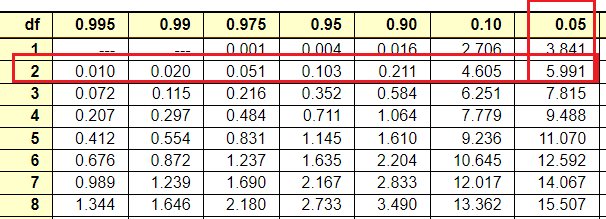

Critical Value is 5.991 at degree of freedom of 2 and alpha is at 0.05

#### Chi Square Test
a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables.

In [ ]:
# chi squared
# chi = sum[(observed - expedted)**2  /  expected]
# Instead of doing manual computation, I will just use the `chi2_contingency` to get the Chi score
chi2

Chi score is below the critical value (Rejected Region) thus we are failed to reject the null hypothesis. Ant type doesn't avary among grades.

#### Visualization

In [ ]:
from scipy.stats import chi2
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 7, 0.001)

#define Chi-square distributions
plt.plot(x, chi2.pdf(x, df=2), label='degree of freedom: 2')
plt.axvline(5.991, linestyle='--', color='r', label='Critical Value at pval of 0.05')
plt.axvline(4.96, linestyle='--', color='g', label='Chi-square test value')

#add legend to plot
plt.legend(loc='upper center')

#### Using P-Value

In [ ]:
# run Chi-Square test and print p-value
chi2, pval, dof, expected = chi2_contingency(ct)
pval

P-val is beyond our significant value(0.05), Also conculude that we are failed to reject the null hypothesis.

***

***

# A and B Test

### Example 1

This example will test weather veiwers will click/watch our recommended video base on the thumbnail image provided.

In [ ]:
df = pd.read_csv('dataset_files/AB_test.csv')
print(df.shape)
df.sample(2)

#### Inpect the value counts for suggetion type category.

In [ ]:
ct = pd.crosstab(df.suggestion_type, df.Click_flag, margins=True)
ct

#### Click Rate

In [ ]:
Click_rate_cuteFace = 117 / 375
Click_rate_SexyBody = 130 / 336
print(Click_rate_cuteFace)
print(round(Click_rate_SexyBody,3))

#### State the null and alternative hypothesis
- Ho: There is no significant difference between the two thumbnails
- Ha: There is a significant difference between the two thumbnails

In [ ]:
# remove margin in our contingency so that our chi2_contingency will compute the correct values
ct = pd.crosstab(df.suggestion_type, df.Click_flag)
chi2, pval, dof, expected = chi2_contingency(ct)
chi2, pval, dof,

In [ ]:
chi2

In [ ]:
from scipy.stats import chi2
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 7, 0.001)

#define Chi-square distributions
plt.plot(x, chi2.pdf(x, df=dof), label='degree of freedom: ' + str(dof))
plt.axvline(3.841, linestyle='--', color='r', label='Critical Value at pval of 0.05')
plt.axvline(4.061, linestyle='--', color='g', label='Chi-square test value')

#add legend to plot
plt.legend(loc='upper center')

- Chi square test fall under the rejection area
- P val is below our significant threshold
- Reject the null hypothesis (Accept the Alternative), There is a significant difference between the two thumbnails thus we should use the sexy body thumbnails to attract more viewers.

***